In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import random

In [2]:
df= pd.read_csv('dataset/student_clustering.csv')
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


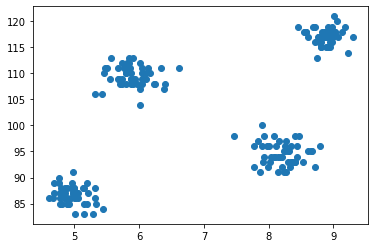

In [3]:
plt.scatter(df['cgpa'], df['iq'])

# K Means
- 1) decide clusters.
- 2) select random centroids.
- 3) Assign clusters.
- 4) move centroids.
- 5) check finish.

In [23]:
class KMeans: 
    def __init__(self, n_clusters, max_iter):
        self.n_clusters= n_clusters # step 1
        self.max_iter= max_iter
        self.centroids= None
        
    def fit_predict(self, X):
        
        random_indexs= random.sample(range(0, X.shape[0]), self.n_clusters) # selecting random row's based on no of cluster # that act as a starting point of centroid 
        self.centroids= X[random_indexs] # starting centroids at random #step 2
        
        for i in range(self.max_iter):
            cluster_group= self.assign_clusters(X) # which row got which cluster optimally based on current centroids # step 3) assign clusters
            
            old_centroid= self.centroids
            self.centroids= self.move_centroids(X, cluster_group) # step 4) moves the centroid 
            
            if (old_centroid == self.centroids).all():
                break
                
        return cluster_group
    
    def assign_clusters(self, X):# assigning best cluster possible to each datapoint <-> row
        
        cluster_group= [] # which row and which cluster it belongs according to this centroid's optimally  
        distances= [] # contains distance's between datapoint and centroid's 
        
        for row in X: 
            for centroid in self.centroids:
                distances.append( np.sqrt(np.dot(row-centroid,row-centroid)) ) # calculating ecludian distance for  each row w.r.t to current centroids
                
            min_distance= min(distances) # which centroid is the nearest to this row # the min distance 
            index_pos= distances.index(min_distance) # the cluster in which the current row belong # 0 based cluster indexing
            
            cluster_group.append(index_pos)
            
            distances= [] # emptying for the next row 
                
        return np.array(cluster_group)
    
    def move_centroids(self, X, cluster_group):
        
        new_centroids= []
        cluster_type= np.unique(cluster_group)
        
        # print(cluster_type) # types of cluster  
        
        for type in cluster_type:
            new_centroids.append( X[cluster_group == type].mean( axis=0 ) ) # column wise mean based on cluster 

        return np.array(new_centroids)
        

In [24]:
X= df.iloc[:,:].values
km= KMeans(n_clusters= 4, max_iter= 300)
y_means= km.fit_predict(X)

In [25]:
y_means

array([2, 1, 3, 3, 1, 1, 3, 0, 1, 3, 2, 1, 3, 2, 1, 3, 1, 3, 1, 1, 3, 2,
       3, 2, 2, 3, 2, 0, 3, 1, 0, 1, 0, 1, 3, 3, 0, 1, 2, 1, 2, 3, 3, 2,
       0, 0, 3, 1, 0, 1, 2, 2, 0, 3, 0, 1, 1, 0, 1, 0, 1, 3, 3, 0, 2, 0,
       3, 2, 1, 3, 1, 0, 3, 2, 1, 0, 1, 0, 2, 3, 3, 0, 1, 2, 0, 2, 0, 1,
       0, 1, 0, 0, 3, 2, 3, 3, 0, 3, 2, 0, 1, 2, 2, 0, 2, 2, 3, 2, 0, 0,
       3, 0, 1, 1, 3, 0, 3, 1, 0, 2, 2, 1, 3, 0, 3, 2, 3, 1, 2, 3, 3, 1,
       2, 2, 1, 0, 1, 2, 3, 3, 3, 2, 1, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0,
       2, 3, 1, 0, 1, 3, 2, 0, 1, 3, 0, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 3,
       0, 1, 2, 0, 0, 1, 1, 1, 3, 2, 3, 3, 0, 1, 3, 3, 2, 2, 3, 2, 0, 1,
       1, 0])

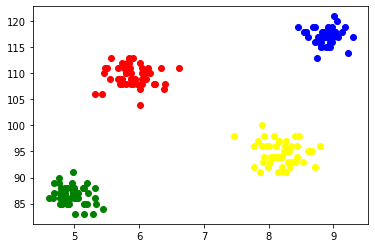

In [26]:
# properly clustured 
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],  color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],  color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],  color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],  color='yellow')